<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Ago18-19/Tarea%20Ago19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/EXR.txt",delimiter = ',').T
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[1.8, 1.6, 2.5, 1.9, 1.3, 2.3, 1.2, 2.3, 2. , 1.5, 2.1, 1.5, 1.5,
        1.8, 1. , 2.1, 1.6, 1.7, 2. , 1.8, 1.3, 1.5, 3.6, 2.4, 2.2, 2.7,
        2.9, 2. , 1. , 2.4, 2.4, 2.3, 2. , 3.3, 1.9, 1.8, 2.8, 2.5, 0.8,
        1.3, 3.7, 2.4, 4.1, 2.4, 2.3, 3.1, 1.5, 3.6, 2.5, 2.1, 1.8, 1.5,
        2.5, 1.5, 1.5, 1.6, 1.4, 4. , 2. , 2.5, 3.1, 1.7, 1.8, 1.9, 5.3,
        1.6, 1.6, 3.3, 1.5, 2.2, 1.1, 2.6, 6.4, 1.5, 3. , 2.6, 1.2, 2.1,
        1.1, 1. , 1.4, 1.7, 1.2, 2.5, 1.2, 2.5, 1.9, 1.8, 1.2, 1.3],
       [1.6, 1.9, 2.8, 2.4, 1.5, 1.8, 1.3, 2.4, 2.1, 1.5, 2.4, 1.5, 1.7,
        2.1, 1.2, 1.9, 1.6, 1.6, 1.9, 1.6, 4.1, 1.9, 2.1, 2.2, 2.3, 2.2,
        3.1, 2.2, 1.2, 2.6, 1.2, 2.3, 1.6, 3.8, 1.6, 1.5, 1.8, 1.5, 1. ,
        1.2, 1.4, 1.6, 3.2, 1.2, 2.3, 1.6, 1.4, 2.1, 1.7, 1.7, 1.2, 1.3,
        1.1, 1.2, 1.1, 1.2, 1.4, 2.3, 1.2, 1.5, 2.4, 1.8, 1.6, 1.7, 4.2,
        1.6, 1.4, 3.3, 1.5, 2.8, 1.6, 2.6, 5. , 1.4, 2.8, 2.3, 1.2, 1.9,
        1.1, 1. , 1.5, 1.3, 1.1, 2.4, 1.3, 2.9, 1.7, 1.

## Problema
Reiss et al. (A-3) compararon ensayos de laboratorio hospitalarios estándar y en el punto de atención para monitorear pacientes que recibieron un solo anticoagulante o un régimen que consiste en una combinación de anticoagulantes. Cuando se comparan dos técnicas de medición, es bastante común usar análisis de regresión en los que una variable se usa para predecir otra.

En el presente estudio, los investigadores obtuvieron medidas de la razón normalizada internacional (INR) mediante análisis de muestras de sangre venosa y capilar recolectadas de 90 sujetos que tomaban warfarina. El INR, utilizado especialmente cuando los pacientes reciben warfarina, mide la capacidad de coagulación de la sangre. Las pruebas de INR en el punto de atención se realizaron con el producto de ensayo CoaguChek. Las pruebas hospitalarias se realizaron con ensayos estándar de laboratorio hospitalario. Los autores utilizaron el nivel de INR del ensayo del hospital para predecir el nivel de INR de CoaguChek. Las medidas se dan en la siguiente tabla.

In [3]:
x=data[0]
y=data[1]

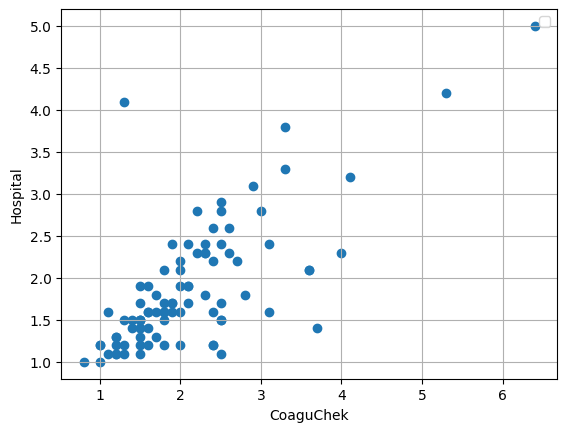

In [9]:
plt.scatter(x,y)
plt.grid()
plt.xlabel('CoaguChek')
plt.ylabel('Hospital')
plt.legend()

Funcion polinomial
$$y = w_0 + w_1 x + w_2 x^2 + ... + w_n x^n $$
Funcion logaritmo
$$y = a + b * log(x) $$

In [5]:
#Función Polinomial
def W(x,y,o=1):
  X=np.ones((o+1,len(x)),dtype=float)
  for i in range(o+1):
    for j in range(len(x)):
      X[i][j]=float(x[j]**i)
  X=X.T
  w=np.linalg.inv(X.T@ X)@ X.T @ y
  return w

#Función logaritmica
def Wlog(x,y):
  X=np.ones((2,len(x)),dtype=float)
  for i in range(len(x)):
    X[1][i]=float(np.log(x[i]))
  X=X.T
  w=np.linalg.inv(X.T@ X)@ X.T @ y
  return w

#Función Generadora Polinomial
def fun(x,w):
  y=0.0
  for i in range(0,len(w)):
    y += w[i]*x**i
  return y

#Funcion Generadora Logaritmo
def funlog(x,w):
  y=0.0
  for i in range(0,len(w)):
    y += w[i]*np.log(x)**i
  return y

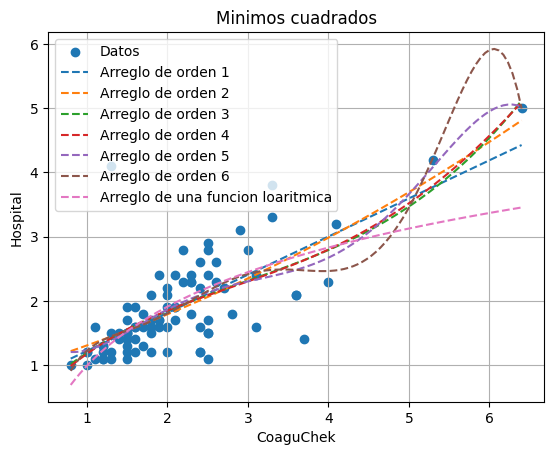

In [8]:
# Dominio
x1=np.linspace(np.min(x),np.max(x),100)

#Grafico
plt.scatter(x,y,label='Datos')
for i in range(1,7):
  plt.plot(x1,fun(x1,W(x,y,i)),'--',label='Arreglo de orden '+str(i))
plt.plot(x1,funlog(x1,Wlog(x,y)),'--',label='Arreglo de una funcion loaritmica')
plt.grid()
plt.xlabel('CoaguChek')
plt.ylabel('Hospital')
plt.title('Minimos cuadrados')
plt.legend()

## Conclusión
+ Como podemos observar entre mayor sea el orden, más curvas presenta el arreglo matemático, como se observa para el arreglo de orden 6 en adelante que presenta curvas más pronunciadas.

+ El conjunto de datos observados se encuentra con una ligera agrupación en al principio de la escala (CoaguChek), con lo que podemos observar que en esta zona el arreglo se comporta de manera lineal hasta que el orden se acerca al número de datos.

+ Por último, un arreglo con una forma logarítmica se comporta bien cuando la densidad de datos sea mayor, pero como vemos en la gráfica, se desvían de los puntos, como un polinomio de segundo orden.
